In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM',
    'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TMUS', 
    'TREX', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL',
    'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AGI', 'AMEH', 'AMRK', 'APT', 'BRTX', 'BTTR', 'BYRN', 'CEF',
    'CELH', 'CENN', 'CGAU', 'CHEF', 'COOP', 'CTGO', 'CVE', 'DQ',
    'DTST', 'DYAI', 'EA', 'EP', 'ERIE', 'ESOA', 'FCUV', 'FKWL', 'FNV',
    'FSI', 'GCBC', 'GME', 'HBM', 'HMY', 'HNRG', 'IDR', 'INTZ', 'LPLA',
    'MCVT', 'MICS', 'MNMD', 'MOBQ', 'MTA', 'OMQS', 'PACB', 'PETV',
    'POWW', 'PRPH', 'RVP', 'RVYL', 'SAND', 'SOBR', 'TGLS', 'VIRT',
    'VIVO', 'WAVD', 'WKHS', 'WRN', 'YORW', 'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'AMAT', 'APPS', 'BBY', 'BLMN', 'CF', 'CHUY', 'CSIQ',
    'DGII', 'FIVE', 'GGB', 'GTLS', 'KLAC', 'LFMD', 'MEI', 'SIVB',
    'SIX', 'TECK', 'TGH', 'UAN']

INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2013-01-21', datetime.date(2023, 1, 21))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  167 of 167 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AGI... AMAT... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APPS... APT... ASML... AXON... BBY... BLMN... BROS... BRTX... BTTR... BYND... BYRN... CEF... CELH... CENN... CF... CGAU... CHEF... CHUY... CHWY... COOP... CRWD... CSIQ... CTGO... CVE... DDOG... DGII... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EA... EDIT... EP... ERIE... ESOA... ETSY... FCUV... FIVE... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GGB... GH... GME... GMED... GOOG... GTLS... HBM... HMY... HNRG... IDR... IDXX... INTG... INTZ... ISRG... JD... KLAC... LFMD... LPLA... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MEI... MELI... MICS... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NET... NOW... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN

In [5]:
data['Date'].tail()

2513   2023-01-13
2514   2023-01-17
2515   2023-01-18
2516   2023-01-19
2517   2023-01-20
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.001507
2       1.000007
3       1.005445
4       0.998150
5       1.005106
          ...   
2513    1.003997
2514    0.997970
2515    0.984437
2516    0.992362
2517    1.018918
Name: ^GSPC, Length: 2517, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.008944
2,1.012272
3,1.021544
4,1.007576
5,1.008263
...,...
2513,1.018764
2514,1.022756
2515,0.996764
2516,1.000505


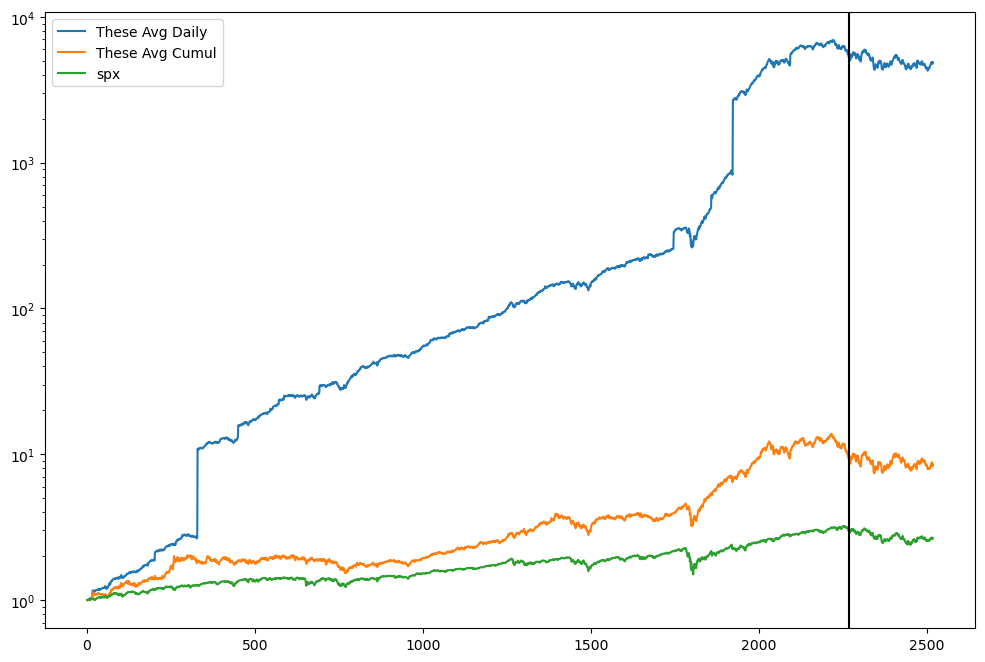

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2013-01-22,NaN,NaN
1,2013-01-23,0.996757,0.996757
2,2013-01-24,0.995456,0.995423
3,2013-01-25,0.995705,0.996169
4,2013-01-28,0.999840,0.999104


In [10]:
out.tail()

,Date,mine1,mine2
2513,2023-01-13,4887.186625,8.674003
2514,2023-01-17,4912.750971,8.827439
2515,2023-01-18,4821.201563,8.440129
2516,2023-01-19,4759.306975,8.257658
2517,2023-01-20,4888.733762,8.504932


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dar_by_state.csv            nya1965.csv
dev_quantiles.csv           pct_params
historic.csv                scoring.csv
hmm_exp_returns.csv         sharpes_by_state.csv
mine.csv                    sp1950.csv
myHistoric.RData            transition_probs.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

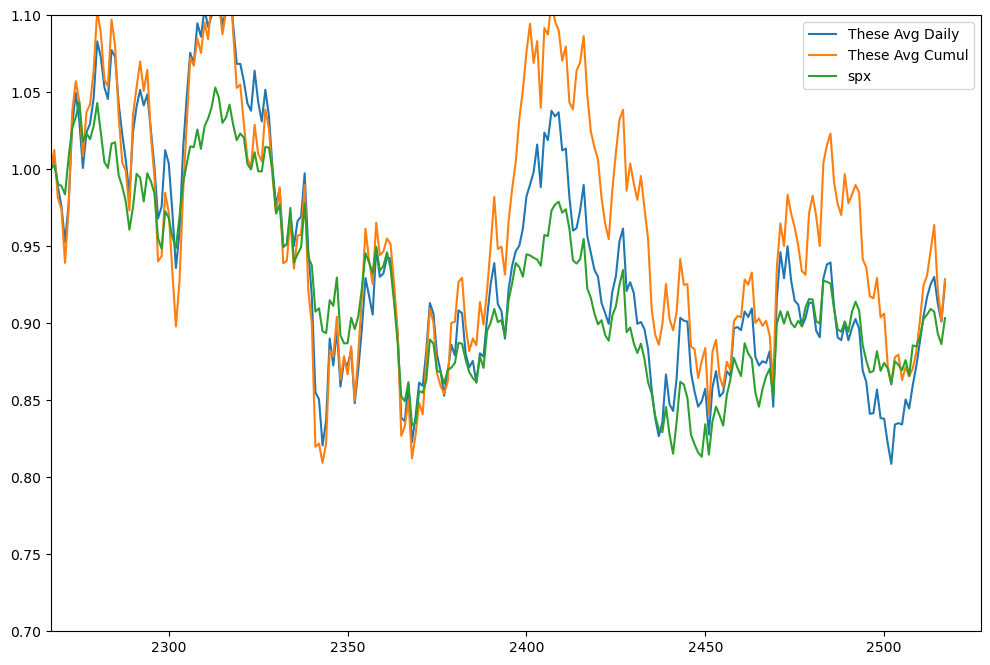

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.7, 1.1)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2458,50.009998,50.009998,50.494999,47.700001,47.889999,3.912223,1.044268,1.063816,1.018719
2459,50.630001,50.630001,53.009998,50.020000,50.290001,3.924544,1.006761,1.012398,1.005599
2460,49.590000,49.590000,50.930000,48.570000,50.090000,3.903789,0.990018,0.979459,0.989334
2461,49.540001,49.540001,49.575001,46.810001,48.799999,3.902780,1.015164,0.998992,0.984069
2462,49.680000,49.680000,51.369999,48.560001,49.580002,3.905602,1.002017,1.002826,1.000807


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2458,50.009998,50.009998,50.494999,47.700001
2459,50.630001,50.630001,53.009998,50.020000
2460,49.590000,49.590000,50.930000,48.570000
2461,49.540001,49.540001,49.575001,46.810001
2462,49.680000,49.680000,51.369999,48.560001


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2458,50.009998,50.009998,50.494999,47.700001,53.009998,50.020000,1.059988,1.000200
2459,50.630001,50.630001,53.009998,50.020000,50.930000,48.570000,1.005925,0.959313
2460,49.590000,49.590000,50.930000,48.570000,49.575001,46.810001,0.999698,0.943940
2461,49.540001,49.540001,49.575001,46.810001,51.369999,48.560001,1.036940,0.980218
2462,49.680000,49.680000,51.369999,48.560001,52.090000,48.910000,1.048510,0.984501


0.05    0.99015
Name: HighMult, dtype: float64


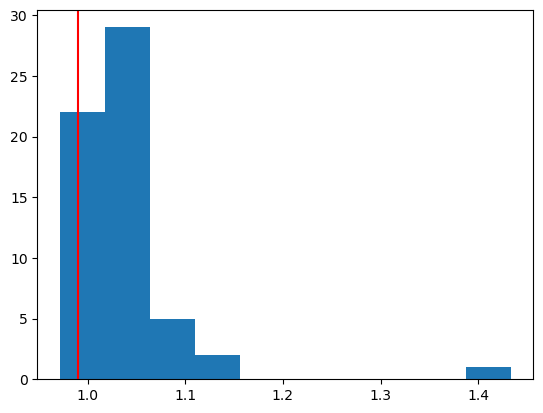

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0227213369361787


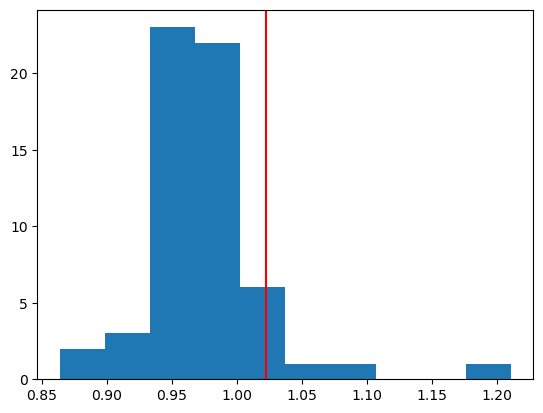

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0227213369361787, 0.9901499472761032)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0044020497626474, 0.9901463579599322)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2458,50.009998,50.009998,50.494999,47.700001,53.009998,50.020000,1.059988,1.000200,0
2459,50.630001,50.630001,53.009998,50.020000,50.930000,48.570000,1.005925,0.959313,1
2460,49.590000,49.590000,50.930000,48.570000,49.575001,46.810001,0.999698,0.943940,0
2461,49.540001,49.540001,49.575001,46.810001,51.369999,48.560001,1.036940,0.980218,0
2462,49.680000,49.680000,51.369999,48.560001,52.090000,48.910000,1.048510,0.984501,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0085388068765841,
 0.9876845515555666,
 1.0680864877902574,
 0.9993577096486272)

In [27]:
get_hilo_mults(aapl)

(0.9974128266060944,
 0.9901336615436135,
 1.0160152336043293,
 0.9921274937250297)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,0.997413,0.990134,1.016015,0.992127
1,ABMD,1.000178,1.000282,1.003278,0.999976
2,ABNB,1.003720,0.993835,1.010195,0.984429
3,ACN,1.002947,0.991997,1.009515,0.986470
4,ADBE,1.002046,0.995260,1.029712,1.002801


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,137.869995,AAPL
ABMD,NaN,ABMD
ABNB,101.279999,ABNB
ACN,280.470001,ACN
ADBE,356.380005,ADBE
...,...,...
ZM,69.5,ZM
ZYXI,15.41,ZYXI
^GSPC,3972.610107,^GSPC
^IXIC,11140.43457,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,0.997413,0.990134,1.016015,0.992127,137.869995
1,ABMD,1.000178,1.000282,1.003278,0.999976,NaN
2,ABNB,1.003720,0.993835,1.010195,0.984429,101.279999
3,ACN,1.002947,0.991997,1.009515,0.986470,280.470001
4,ADBE,1.002046,0.995260,1.029712,1.002801,356.380005


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv